# Named Entity Relationship

### Import Dependencies

In [1]:
import pandas as pd

In [2]:
# Read csv file
file=('Concat_ML_Data/first_debate.csv')
first_df=pd.read_csv(file)
first_df.head()

,tweet,replies_count,retweets_count,likes_count,candidate,tweet_length,Subjectivity,Polarity,Sentiment
0,Truly wish YOU had been the Moderator Brian Y...,0,0,0,Biden,40,0.1,-0.20,Negative
1,Crazy different RT Joe Biden hit Trump with th...,0,0,0,Biden,13,0.7,-0.20,Negative
2,Brilliant retort Joe The world hopes for your...,0,0,0,Biden,20,0.5,0.45,Positive
3,Anytime or slandering Joe Biden Me,0,2,2,Biden,6,0.0,0.00,Neutral
4,You are just trying to rile us and it working,0,0,1,Biden,10,0.0,0.00,Neutral


### Separate Datasets for Biden and Trump

In [3]:
# Separating entire dataset to sentiments for Trump and Biden
biden_sentiment=first_df[(first_df['candidate']=='Biden')]
trump_sentiment=first_df[(first_df['candidate']=='Trump')]

In [4]:
# As datasets are large, we decided to choose a fraction of each dataset
biden_sentiment=biden_sentiment.sample(frac = 0.1)
trump_sentiment=trump_sentiment.sample(frac = 0.1)

### Import Dependency for NER

In [5]:
import spacy
from spacy import displacy

In [6]:
# !python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [7]:
nlp=spacy.load('en_core_web_sm')

### Create Function for Named Entity Relationship (NER)

In [8]:
entities = []
labels = []
def ner_table(row):
    ner_table=row['tweet']
    for sentence in ner_table:
        doc=nlp(sentence)
        for ent in doc.ents:
            entities.append(ent)
            labels.append(ent.label_)
    return ('NER Complete')

### NER Biden First Debate

In [9]:
# Running NER function on biden database
ner_table(biden_sentiment)

'NER Complete'

In [10]:
# Creating dataframe with entities and labels columns
df_biden = pd.DataFrame({'Entities':entities,'Labels':labels})
df_biden

,Entities,Labels
0,"(Debat, Calon)",ORG
1,"(Joe, Biden, Semua)",PERSON
2,"(Tahu, Donald, Trump)",PERSON
3,(WWII),EVENT
4,(Yup),PERSON
...,...,...
21079,"(Joe, Biden)",PERSON
21080,(Mmm),ORG
21081,"(DoBrasil, vamos)",PERSON
21082,"(Joe, Biden)",PERSON


In [11]:
# Grouping by Labels
df_biden_labels = df_biden.groupby(["Labels"]).count()["Entities"]
df_biden_labels

Labels
CARDINAL       1773
DATE           1374
EVENT            68
FAC             161
GPE            1986
LANGUAGE         16
LAW              47
LOC             584
MONEY            52
NORP           1438
ORDINAL         348
ORG            3192
PERCENT          11
PERSON         8935
PRODUCT         123
QUANTITY         44
TIME            785
WORK_OF_ART     147
Name: Entities, dtype: int64

In [12]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_biden_labels)
df

,Entities
Labels,
CARDINAL,1773
DATE,1374
EVENT,68
FAC,161
GPE,1986
LANGUAGE,16
LAW,47
LOC,584
MONEY,52


In [13]:
# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,8935
ORG,3192
GPE,1986
CARDINAL,1773
NORP,1438
DATE,1374
TIME,785
LOC,584
ORDINAL,348


### Top Ten Labels - Biden

In [14]:
# Only using the top 10 Labels
biden_labels=df.head(10)
biden_labels

,Entities
Labels,
PERSON,8935
ORG,3192
GPE,1986
CARDINAL,1773
NORP,1438
DATE,1374
TIME,785
LOC,584
ORDINAL,348


In [15]:
# Import Dependency to plot bar chart
import matplotlib.pyplot as plt

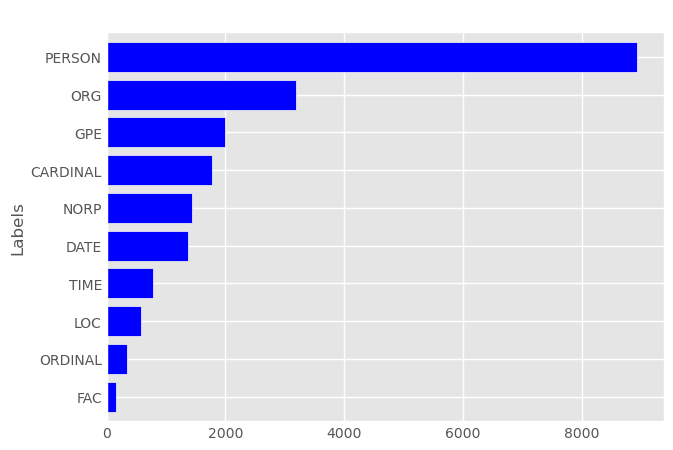

In [69]:
plt.style.use('ggplot')
biden_labels.plot(kind='barh', legend= False, color='blue', edgecolor='white',
                  width=0.8, title='Biden NER')
plt.gca().invert_yaxis()
plt.title('NER Biden')
plt.show()

### Explanations for Labels

In [86]:
# Choose one at a time
# spacy.explain("PERSON")
# spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

'Countries, cities, states'

### NER Trump First Debate

In [38]:
# Running NER function on biden database
ner_table(trump_sentiment)

'NER Complete'

In [39]:
# Creating dataframe with entities and labels columns
df_trump = pd.DataFrame({'Entities':entities,'Labels':labels})
df_trump

,Entities,Labels
0,"(Debat, Calon)",ORG
1,"(Joe, Biden, Semua)",PERSON
2,"(Tahu, Donald, Trump)",PERSON
3,(WWII),EVENT
4,(Yup),PERSON
...,...,...
52935,"(Donald, Trump)",PERSON
52936,"(Lmfaoo, Bernie, Sanders)",PERSON
52937,(2020),DATE
52938,(Law),PERSON


In [40]:
# Grouping by Labels
df_trump_labels = df_trump.groupby(["Labels"]).count()["Entities"]
df_trump_labels

Labels
CARDINAL        4785
DATE            3667
EVENT            182
FAC              421
GPE             5145
LANGUAGE          30
LAW              150
LOC             1477
MONEY            134
NORP            4197
ORDINAL          850
ORG             8954
PERCENT           29
PERSON         19818
PRODUCT          334
QUANTITY         101
TIME            2255
WORK_OF_ART      411
Name: Entities, dtype: int64

In [41]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_trump_labels)
df

,Entities
Labels,
CARDINAL,4785
DATE,3667
EVENT,182
FAC,421
GPE,5145
LANGUAGE,30
LAW,150
LOC,1477
MONEY,134


In [42]:
# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,19818
ORG,8954
GPE,5145
CARDINAL,4785
NORP,4197
DATE,3667
TIME,2255
LOC,1477
ORDINAL,850


In [43]:
# Only using the top 10 Labels
trump_labels=df.head(10)
trump_labels

,Entities
Labels,
PERSON,19818
ORG,8954
GPE,5145
CARDINAL,4785
NORP,4197
DATE,3667
TIME,2255
LOC,1477
ORDINAL,850


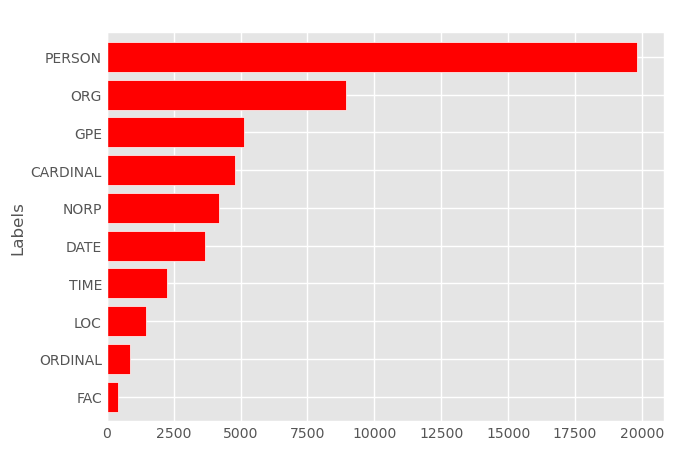

In [68]:
plt.style.use('ggplot')

trump_labels.plot(kind='barh', legend= False, color='red', edgecolor='white',
                  width=0.8)
plt.gca().invert_yaxis()
plt.title('NER Trump')
plt.show()

### Explanations for Labels

In [70]:
# Choose one at a time
# spacy.explain("PERSON")
spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

'Companies, agencies, institutions, etc.'

In [73]:
biden_labels=biden_labels.rename(columns={"Entities": "Biden"})
biden_labels

,Biden
Labels,
PERSON,8935
ORG,3192
GPE,1986
CARDINAL,1773
NORP,1438
DATE,1374
TIME,785
LOC,584
ORDINAL,348


In [74]:
trump_labels=trump_labels.rename(columns={"Entities": "Trump"})
trump_labels

,Trump
Labels,
PERSON,19818
ORG,8954
GPE,5145
CARDINAL,4785
NORP,4197
DATE,3667
TIME,2255
LOC,1477
ORDINAL,850


In [77]:
NER_Table = biden_labels.merge(trump_labels, on='Labels', how='left')
NER_Table

,Biden,Trump
Labels,,
PERSON,8935,19818
ORG,3192,8954
GPE,1986,5145
CARDINAL,1773,4785
NORP,1438,4197
DATE,1374,3667
TIME,785,2255
LOC,584,1477
ORDINAL,348,850


In [89]:
NER_Table.to_csv(r'C:\Users\Greg\Documents\Analysis_Projects\Final_Project\Concat_ML_Data\ner_table.csv', index = True, header=True)